<a href="https://colab.research.google.com/github/rcazevedo/Fuzzy-Sets/blob/main/INPE_CAP_424_3_FuzzySerie6_Cap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultado B': [0.2211 0.4489 0.5    0.4489 0.2211]


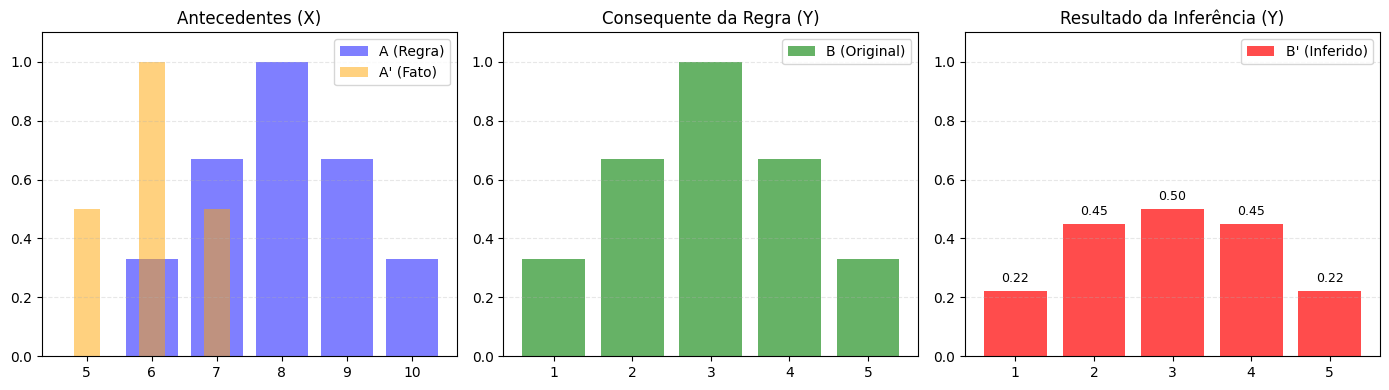

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. Definição dos Dados
# ==========================================
# Universos e Conjuntos
X = [5, 6, 7, 8, 9, 10]
Y = [1, 2, 3, 4, 5]

# Dicionários de Pertinência
A = {6: 0.33, 7: 0.67, 8: 1.00, 9: 0.67, 10: 0.33}
B = {1: 0.33, 2: 0.67, 3: 1.00, 4: 0.67, 5: 0.33}
A_prime = {5: 0.5, 6: 1.00, 7: 0.5}

# Função auxiliar para pegar valor do dicionário (retorna 0 se não existir)
def get_mu(d, k):
    return d.get(k, 0.0)

# ==========================================
# 2. Cálculo (Inferência de Larsen)
# ==========================================

# A. Matriz de Relação (R = A * B)
R = np.zeros((len(X), len(Y)))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        R[i, j] = get_mu(A, x) * get_mu(B, y)

# B. Inferência (GMP Max-Min: B' = A' o R)
B_res = []
for j, y in enumerate(Y):
    # Calcula o mínimo entre A'(x) e R(x,y) para todo x
    vals = [min(get_mu(A_prime, x), R[i, j]) for i, x in enumerate(X)]
    # Pega o máximo desses valores (Agregação)
    B_res.append(max(vals))

# Imprime o resultado numérico
print("Resultado B':", np.round(B_res, 4))

# ==========================================
# 3. Geração do Gráfico (Matplotlib)
# ==========================================
plt.figure(figsize=(14, 4))

# Subplot 1: Entradas (A e A')
plt.subplot(1, 3, 1)
# Plota A (azul)
plt.bar(X, [get_mu(A, x) for x in X], alpha=0.5, label='A (Regra)', color='blue')
# Plota A' (laranja, mais estreito para visualização)
plt.bar(X, [get_mu(A_prime, x) for x in X], alpha=0.5, label="A' (Fato)", color='orange', width=0.4)
plt.title("Antecedentes (X)")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Subplot 2: Consequente Original (B)
plt.subplot(1, 3, 2)
plt.bar(Y, [get_mu(B, y) for y in Y], alpha=0.6, label='B (Original)', color='green')
plt.title("Consequente da Regra (Y)")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Subplot 3: Consequente Inferido (B')
plt.subplot(1, 3, 3)
bars = plt.bar(Y, B_res, alpha=0.7, label="B' (Inferido)", color='red')
plt.title("Resultado da Inferência (Y)")
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adiciona os valores acima das barras vermelhas
for bar, val in zip(bars, B_res):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.02,
             f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
# Saida: [0.2211 0.4489 0.5    0.4489 0.2211]

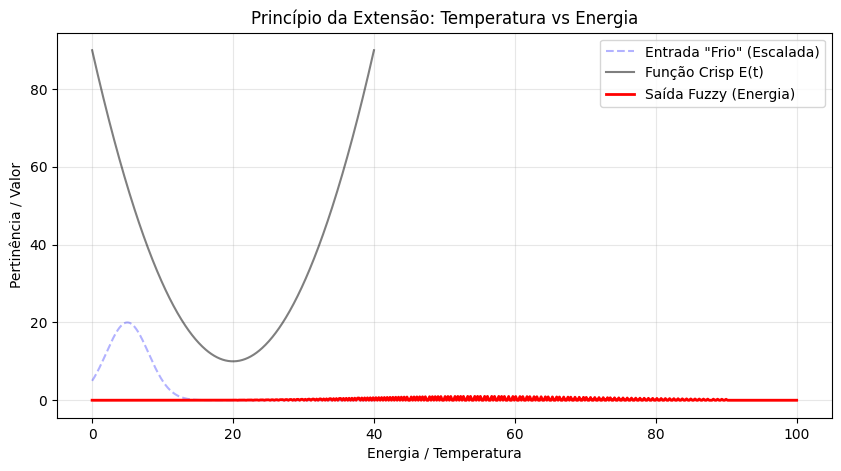

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definição das Funções
# Funcao Base (Crisp)
func_crisp = lambda t: 0.2 * (t - 20) ** 2 + 10

# Entrada gaussiana centrada em 5 graus ("Frio")
mu_in_cold = lambda x: np.exp(-0.5 * ((x - 5) / 3) ** 2)

# 2. Definição dos Universos
temps = np.linspace(0, 40, 500)
energies = np.linspace(0, 100, 500)

# 3. Inicialização da Saída
mu_ext = np.zeros_like(energies)

# 4. Cálculo (Princípio da Extensão)
for i, t in enumerate(temps):
    y_val = func_crisp(t)
    mu_val = mu_in_cold(t)

    # Encontra o índice correspondente no universo Y (Energia)
    idx = (np.abs(energies - y_val)).argmin()

    # Sup (Max) das pertinências que levam a y
    mu_ext[idx] = max(mu_ext[idx], mu_val)

# 5. Visualização (Plotagem)
plt.figure(figsize=(10, 5))

# Plot da Entrada (apenas para referência visual, escalada)
plt.plot(temps, mu_in_cold(temps) * 20, 'b--', label='Entrada "Frio" (Escalada)', alpha=0.3)

# Plot da Função Base
plt.plot(temps, func_crisp(temps), 'k', label='Função Crisp E(t)', alpha=0.5)

# Plot do Resultado Fuzzy
plt.plot(energies, mu_ext, 'r', linewidth=2, label='Saída Fuzzy (Energia)')
plt.fill_between(energies, 0, mu_ext, color='r', alpha=0.2)

plt.title("Princípio da Extensão: Temperatura vs Energia")
plt.xlabel("Energia / Temperatura")
plt.ylabel("Pertinência / Valor")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

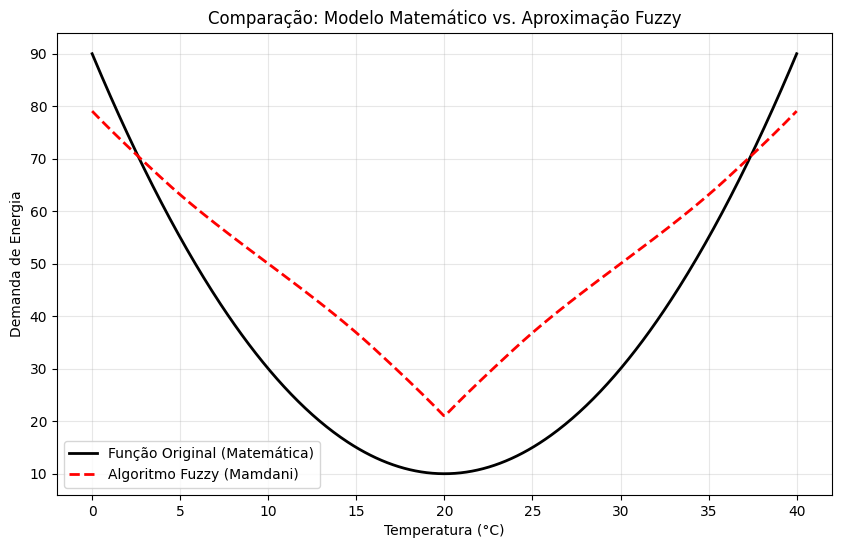

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. Configuração Inicial (Universos)
# ==========================================
temps = np.linspace(0, 40, 500)
energies = np.linspace(0, 100, 500)

# Função Crisp original (para comparação no gráfico)
func_crisp = lambda t: 0.2 * (t - 20) ** 2 + 10

# ==========================================
# 2. Funções Auxiliares
# ==========================================
def trimf(x, p):
    """Função de pertinência triangular"""
    # O termo 1e-9 evita divisão por zero
    return np.maximum(0, np.minimum((x - p[0]) / (p[1] - p[0] + 1e-9),
                                    (p[2] - x) / (p[2] - p[1] + 1e-9)))

# ==========================================
# 3. Algoritmo Fuzzy (Mamdani)
# ==========================================
y_mamdani = []

for t in temps:
    # --- Fuzzificação (Antecedentes) ---
    w_cold = trimf(t, [-20, 0, 20])
    w_conf = trimf(t, [0, 20, 40])
    w_hot = trimf(t, [20, 40, 60])

    # --- Definição dos Consequentes ---
    # Baixa (centro 10), Alta (centro 90)
    mu_low_y = trimf(energies, [-40, 10, 60])
    mu_high_y = trimf(energies, [40, 90, 140])

    # --- Implicação (Min) ---
    r1 = np.minimum(w_cold, mu_high_y)   # Se Frio -> Alta
    r2 = np.minimum(w_conf, mu_low_y)    # Se Conforto -> Baixa
    r3 = np.minimum(w_hot, mu_high_y)    # Se Quente -> Alta

    # --- Agregação (Max) ---
    agg = np.maximum(r1, np.maximum(r2, r3))

    # --- Defuzzificação (Centroide) ---
    if np.sum(agg) > 0:
        y_out = np.sum(energies * agg) / np.sum(agg)
    else:
        y_out = 0

    y_mamdani.append(y_out)

# ==========================================
# 4. Plotagem dos Resultados
# ==========================================
plt.figure(figsize=(10, 6))

# Plot da Função Original (Preto)
plt.plot(temps, func_crisp(temps), 'k', linewidth=2, label='Função Original (Matemática)')

# Plot do Algoritmo Fuzzy (Vermelho Tracejado)
plt.plot(temps, y_mamdani, 'r--', linewidth=2, label='Algoritmo Fuzzy (Mamdani)')

plt.title("Comparação: Modelo Matemático vs. Aproximação Fuzzy")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Demanda de Energia")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()